In [1]:
%matplotlib inline 
import experiment as ex
from network_generation import generation as ng
import matplotlib.pyplot as plt
import numpy as np
import pickle 
from scipy import stats 

## compute error of the CV

In [2]:
def compute_CV(data):
    
    n = float(len(data))
    
    # compute nth sample moment
    mu4 = stats.moment(data,moment=4)
    mu2 =  stats.moment(data,moment=2)
    var = np.var(data)

    # the fourth population moment estimator 
    D4 = ((n-1)/(n**3))*((n**2 - 3*n + 3)*mu4 + 3*(2*n - 3)*(mu2**2))

    # the estimate of the variance standard error 
    Var_SE = np.sqrt((1/(n))*(D4 - ((n-3)/(n-1))*(var**2)))
    
    # normal approximation 
    # Var_SEn = np.var(data)*np.sqrt(2/((float(n))-1))

    CV = ( np.var(data)**0.5 ) / ( np.mean(data) ) 

    part1 = (Var_SE/(  2.0*(np.var(data)**0.5)*np.mean(data) ) )**2 
    part2 = (  (  ((np.var(data))**0.5)*stats.sem(data)/(np.mean(data)**2)  )  )**2
    CV_SE = np.sqrt( part1  +  part2 )  

    return CV, CV_SE   

## setup

In [14]:
kappa_range = [10]
d_range = [2,3,6,9,15,25]
n = 1000

# MODEL
def f(B, x):
    return np.exp(B[0]*x)

## plot

ER done
d = 2 done
d = 3 done
d = 6 done
d = 9 done
d = 15 done
d = 25 done
d = 2 done
d = 3 done
d = 6 done
d = 9 done
d = 15 done
d = 25 done


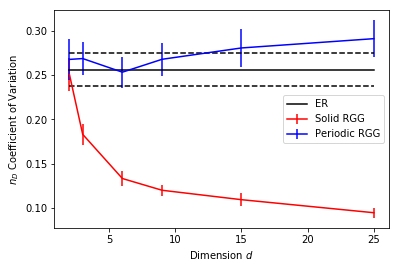

In [15]:
# ER data 
ERE = ex.ERExperiment(kappa_range, n)
ERE.to_LCC()
nD_ERE = ERE.ensembles[0].find_nD_list_LCC()
print 'ER done'

CV_ER, CV_ER_SE = compute_CV(nD_ERE)

###

boundary = 's'
nD_lists_RGG = []
for d in d_range:
    RGG = ex.RGGExperiment(kappa_range, n, d, shortcut_prob=0, boundary=boundary, num_radii=10)
    RGG.to_LCC()
    nD_lists_RGG.append(RGG.ensembles[0].find_nD_list_LCC())
    print "d = " + str(d) + ' done'

CVs = []
CV_SEs = []
for nD_list in nD_lists_RGG:
    c, s = compute_CV(nD_list)
    CVs.append(c)
    CV_SEs.append(s)

###
    
boundary = 'p'
nD_lists_RGG = []
for d in d_range:
    RGG = ex.RGGExperiment(kappa_range, n, d, shortcut_prob=0, boundary=boundary, num_radii=10)
    RGG.to_LCC()
    nD_lists_RGG.append(RGG.ensembles[0].find_nD_list_LCC())
    print "d = " + str(d) + ' done'

CVp = []
CV_SEp = []
for nD_list in nD_lists_RGG:
    c, s = compute_CV(nD_list)
    CVp.append(c)
    CV_SEp.append(s)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(d_range,[CV_ER*o for o in np.ones(len(d_range))],'k',label='ER')
ax.plot(d_range,[CV_ER*o - CV_ER_SE for o in np.ones(len(d_range))],'k--')
ax.plot(d_range,[CV_ER*o + CV_ER_SE for o in np.ones(len(d_range))],'k--')
ax.set_xlabel('Dimension $d$')
ax.set_ylabel('$n_D$ Coefficient of Variation')
ax.errorbar(d_range,CVs,yerr=CV_SEs,label='Solid RGG',color='r')
ax.errorbar(d_range,CVp,yerr=CV_SEp,label='Periodic RGG',color='b')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
fig.savefig('./plots/CV_kappa_10_N_'+str(n)+'.eps')

## gaussian variation 

k = 20 done
k = 30 done


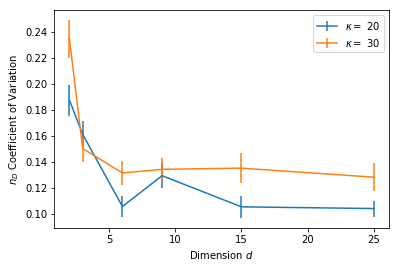

In [13]:
kappa_range = [20,30]#,40,50,60]
boundary = 'g'
n = 1000
d_range = [2,3,6,9,15,25]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# RGG data
handles = []
labels = []
for kappa in kappa_range:
    nD_lists_RGG = []
    for d in d_range:
        RGG = ex.RGGExperiment([kappa], n, d, shortcut_prob=0, boundary=boundary, num_radii=10)
        RGG.to_LCC()
        nD_lists_RGG.append(RGG.ensembles[0].find_nD_list_LCC())
        
    print "k = " + str(kappa) + ' done'

    CVg = []
    CV_SEg = []
    for nD_list in nD_lists_RGG:
        c, s = compute_CV(nD_list)
        CVg.append(c)
        CV_SEg.append(s)

    h = ax.errorbar(d_range,CVg,yerr=CV_SEg,label='$\kappa = $ '+str(kappa))
    handles.append(h)
    labels.append('$\kappa$='+str(kappa))
    
handles, labels = ax.get_legend_handles_labels()
ax.set_xlabel('Dimension $d$')
ax.set_ylabel('$n_D$ Coefficient of Variation')
ax.legend(handles,labels)
# ax.errorbar(d_range,CVs,yerr=CV_SEs,label='RGG solid')
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels)
fig.savefig('./plots/CV_kappa_30_Gaussian_N_'+str(n)+'.eps')

## ER data generation

In [13]:
# GENERATE ER DATA 
kappa_range = [1,3,5,8,10,15,20]
n_range = [1000]
num_samples = 100
print 'running ' + str(len(n_range)*len(kappa_range)) + ' generations'
i=1
for kappa in kappa_range:
    for n in n_range:
        # make an ER Ensemble
        ER = ng.EREnsemble(kappa,n)
        # generate samples 
        # sample data is stored in the object 
        ER.generate_samples(n=num_samples)
        # data to disk 
        ER.to_disk()
        print 'saved run ' + str(i)
        i+=1 

running 7 generations
saved run 1
saved run 2
saved run 3
saved run 4
saved run 5
saved run 6
saved run 7
